# CUSTOMER CHURN ANALYSIS

## Business Project Analysis - Final

_By **Grégory PINCHINAT**_

---

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
+ Help them identify the types of customers who churn
+ Predict who of their current customers will churn next month

## I. Data Understanding

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

+ Customers who left within the last month – the column is called Churn
+ Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# Importing necessary packages for Data Understanding
import pandas as pd
import numpy as np

In [2]:
# Reading Data in a pandas DataFrame
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Setting options to display all columns when asked
pd.set_option('display.max_columns', None)

Let's have a look at the first columns

In [3]:
# List first 5
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's get a broad view of our dataset contents

In [4]:
# Get the count and type of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Good news is: there are no null values in our dataset. We have many columns of object type, which are string type generally. We might want to double-check to see whether there is any `nan` values as well:

In [5]:
# Compute the sum of True's in the boolean DataFrame generated to see whether there is a `nan` type entry or not
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## II. Data Wrangling

Since the data doesn't seem to miss anything, nor hold any inappropirate format, we won't be doing a wrangling-only section. In this part, we will only define some wranglers we may call on later to do the appropriate task when needed. Let's start importing the necessary packages:

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

#### WRANGLER 1 : One-colum Label Encoding

In [7]:
# FUNCTION 1 : 1-COLUMN LABEL ENCODING
def encode(colname):
    newname = colname + 'Lab'
    enc = LabelEncoder()
    df[newname] = enc.fit_transform(df[colname])
    print('Variable converted and added to the DataFrame successfully')
    print(df[newname].dtypes)
    display(df[newname].head())
    return df[newname]

#### WRANGLER 2 : Grouping by count or mean

In [8]:
# FUNCTION 2 : Group one categorical column by another column and return a DataFrame
def group_count(label0='Loyal Customer', label1='Churner', col1='Churn', col2='Churn', cond=None):
    
    
    # Return a DataFrame with the count of col2 and col1 as index
    if cond is None:
        df_group = df[col2].groupby(df[col1]).count().to_frame()
    else:
        df_group = df['ChurnLab'][cond].groupby(df[col1]).count().to_frame()
        
    # Let's rename the only column in the Dataframe
    df_group.columns = ['Count_Churn']

    # Let's add a percent column, too
    df_group['percent_Churn'] = df_group['Count_Churn']/sum(df_group['Count_Churn'])

    # The second column is the same as the first, by default. When this is the case:
    if col1 == col2:
        # Let's reset the index to the set of first n integers, just in case
        df_group.reset_index(inplace=True)
        # We drop the column that holds the same values as the index
        df_group.drop(columns=[col1], inplace=True)

    # We need to use the label names as indexes, so we rename the indexes
    df_group.rename(index={0: label0, 1: label1}, inplace=True)
    return df_group

#### WRANGLER 3 : Grouping by count or mean

In [9]:
# FUNCTION 3 : PLOT BAR GRAPH WITH GROUP_COUNT DATA

def plot_bar(df_group_object, 
             graph_number, 
             col='percent_Churn', 
             title='Total Churn among the Customers', 
             save_name='Total Churn among the Customers', 
             color1='lightgrey', color2='red'):
    # Create axis object
    ax = df_group_object[col].plot(kind='bar', 
                       color=[color1, color2],
                       figsize=(6,4),
                       width=0.6)
    # Title
    plt.title('GRAPH '+str(graph_number)+'.- Distribution of '+title, size=12)
    # Removing spines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    # Removing y values
    plt.yticks([])
    # Setting the label so we can rotate them (they're rotated to 90 by default)
    ax.set_xticklabels(df_group_object.index, rotation=0, size=11)

    # Getting rectangles sizes to annotate bar graph
    for rectangle in ax.patches:
        width, height = rectangle.get_width(), rectangle.get_height()
        x,y = rectangle.get_xy()
        ax.annotate('{:.2%}'.format((height)),
                xy=(x+0.22,y+height/2))
    plt.xlabel('')
    plt.gcf()
    plt.savefig(save_name, bbox_inches='tight', transparent=False)

    #Display bar chart
    plt.show()

### 1. How much is 'Churn' affecting the business? How big is Churn compared to the existing database?

First, let's encode our Churn column to 0 and 1:

In [10]:
# Encode the Churn Data to 0 and 1
df_churn = encode('Churn')

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    1
3    0
4    1
Name: ChurnLab, dtype: int32

Summary the Churn data as count and percent so we can have an idea:

In [11]:
df_churn = group_count()
df_churn

,Count_Churn,percent_Churn
Loyal Customer,5174,0.73463
Churner,1869,0.26537


Let's plot the percentages on a bar graph:

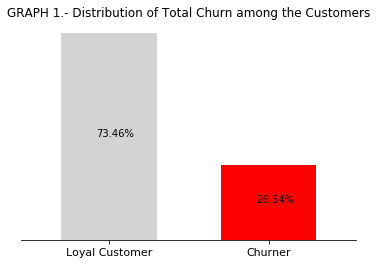

In [12]:
graph1 = plot_bar(df_churn, 1)
graph1

So we have about 27% of monthly churners, coeteris paribus. Meaning we suppose, given the data, that the Churn doesn't change much from this value from one month to another. Let's see how much the revenues are affected

In [13]:
import statsmodels.api as sm
sm.stats.proportion_confint(1869, 1869+5174)  

(0.25505819093335796, 0.2756815506540338)

In [14]:
churn_money = df[['Churn', 'MonthlyCharges']].groupby(['Churn']).sum()
churn_money_percent = churn_money/churn_money.sum()

In [15]:
churn_money_percent

,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


So because of the Churn, the company has lost about 30.5% of the revenue it makes from monthly charges.

### 2. Which kind of customer would be more likely to churn?

__a) By Demographics__

+ __*Age Group*__

In [16]:
churn_age = group_count('Younger', 'Senior', col1='SeniorCitizen', cond=df['ChurnLab']==1)
churn_age

,Count_Churn,percent_Churn
SeniorCitizen,,
Younger,1393,0.745318
Senior,476,0.254682


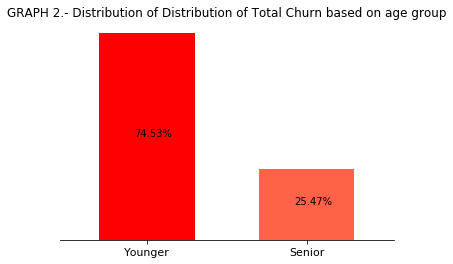

In [17]:
plot_bar(churn_age, 
         col='percent_Churn', 
         graph_number=2, 
         color1='red', 
         color2='tomato',
         title='Distribution of Total Churn based on age group',
         save_name='Distribution of Total Churn based on age group')

The above graph is interesting, but it doesn't give us much information about what is happening inside each group. Maybe the reason why the Total Churn is so high at Younger customers is that Younger customers constitute a majority of the company's customers. We are going to study the Churn inside each respective group, rather than respective to each group:

In [18]:
# Subsetting the Younger and Senior Citizens, each along with their own churn distribution
dx_younger = df.loc[df.SeniorCitizen==0, 'ChurnLab']
dx_Senior = df.loc[df.SeniorCitizen==1, 'ChurnLab']
print('The proportion of Churn among the Youngers is {:.2%} \nand the proportion of Churn among the Seniors is {:.2%}'\
      .format(dx_younger.mean(), dx_Senior.mean()))
print('\nSize of Youngers: {} \nSize of Seniors: {}'.format(len(dx_younger), len(dx_Senior)))
print("\nThe Youngers account for {:.2%} of the population, \nThe Seniors account for {:.2%} of the population".format(\
        len(dx_younger)/(len(dx_younger)+len(dx_Senior)), len(dx_Senior)/(len(dx_younger)+len(dx_Senior))))
print("\nThe Total population is: N = {}".format(len(df)))
print("We may also check that it is {} that {} + {} = {}".format((len(dx_younger)+len(dx_Senior))==len(df), \
                                                       len(dx_younger), len(dx_Senior), len(df)))

The proportion of Churn among the Youngers is 23.61% 
and the proportion of Churn among the Seniors is 41.68%

Size of Youngers: 5901 
Size of Seniors: 1142

The Youngers account for 83.79% of the population, 
The Seniors account for 16.21% of the population

The Total population is: N = 7043
We may also check that it is True that 5901 + 1142 = 7043


Great! We've done a lot of job just to get these results for the age, and we still have a lot of similar jobs to go with. What about writing a new function to not only subset the dataset, but to represent the extracted data as graphs instead of disaggregated computations as we've just done? Let's try that out

In [19]:
# Function for subsetting
def subset(colname, label_value):
    if df[colname].dtype=='int64':
        dz = df.loc[df[colname]==label_value, 'ChurnLab']
    else: 
        encode(colname)
        dz = df.loc[df[colname+'Lab']==label_value, 'ChurnLab']
    return dz

In [20]:
len(subset('SeniorCitizen', 0))

5901

In [21]:
def plott_bar(list_label, list_values, values_in_list, 
             graph_number, 
             title='Total Churn among the Customers', 
             save_name='Total Churn among the Customers', 
             color1='lightgrey', color2='red'):
    # Create axis object
    ax1 = plt.figure(figsize=(6,4))
    plt.bar(list_label, list_values,
                  color=[color1, color2],
                  width=0.6)
    # Title
    plt.title('GRAPH '+str(graph_number)+'.- Distribution of '+title, size=12)
    
    # Removing y values
    plt.yticks([])
    
    # Getting rectangles sizes to annotate bar graph
    for i in range(values_in_list):
        plt.text(i, 0.2, str(round(list_values[i]*100,2))+"%", horizontalalignment='center', verticalalignment='center')
        
    plt.xlabel('')
    plt.gcf()
    plt.savefig(save_name, bbox_inches='tight', transparent=False)

    #Display bar chart
    plt.show()

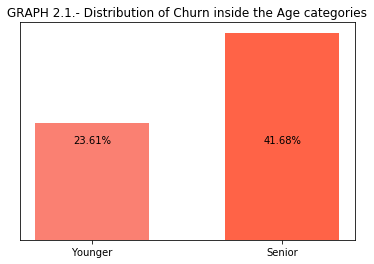

In [22]:
plott_bar(['Younger','Senior'], [dx_younger.mean(), dx_Senior.mean()], 2, 2.1,
         title='Churn inside the Age categories', save_name='Churn inside the Age categories',
         color1='salmon', color2='tomato')

Now it's easier to see that 23.61% of the Younger Customers are churning, while the Senior appear to churn more: 41.68%.

+ __*Gender*__

In [23]:
# Subset the distributions of Churn for Females then for Males
dx_genderF = subset('gender',0)
dx_genderM = subset('gender',1)

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    1
3    1
4    0
Name: genderLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    1
3    1
4    0
Name: genderLab, dtype: int32

In [24]:
# Check whether the sum of the sizes gives the size of the whole population
len(dx_genderM) + len(dx_genderF) == len(df)

True

In [25]:
dx_genderF

0       0
4       1
5       1
7       0
8       1
       ..
7034    1
7036    0
7037    0
7039    0
7040    0
Name: ChurnLab, Length: 3488, dtype: int32

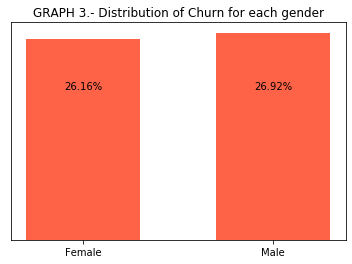

In [26]:
plott_bar(['Female','Male'], [dx_genderM.mean(), dx_genderF.mean()], 2, 3,
         title='Churn for each gender', save_name='Churn for each gender',
         color1='tomato', color2='tomato')

We can see that the graph above shows no apparent difference for the proportion of Churn observed within each of both groups. Let's confirm this with a t-test on the difference of both independant proportions:

In [27]:
# We use sm api for that
import statsmodels.api as sm
sm.stats.ttest_ind(dx_genderM, dx_genderF)

(-0.7226734406634037, 0.4699045390980484, 7041.0)

There's no significant difference since the p-value = 0.47 > 0.05. We may not reject the hypothesis of null difference between the proportions. It means the Churn doesn't really depends on the gender of the customer, both genders churn as much as each other.

+ __*Marital Status*__

In [28]:
set(df.Partner)

{'No', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    0
3    0
4    0
Name: PartnerLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    0
3    0
4    0
Name: PartnerLab, dtype: int32

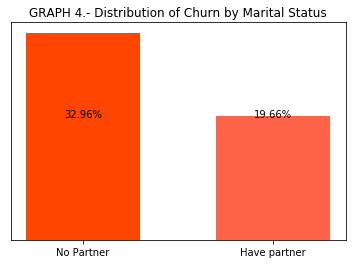

In [29]:
dx_no_partner = subset('Partner', 0)
dx_partner = subset('Partner', 1)

plott_bar(['No Partner','Have partner'], [dx_no_partner.mean(), dx_partner.mean()], 2, 4,
         title='Churn by Marital Status', save_name='Churn by Marital Status',
         color1='orangered', color2='tomato')

+ __*Dependants*__

In [30]:
set(df.Dependents)

{'No', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: DependentsLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: DependentsLab, dtype: int32

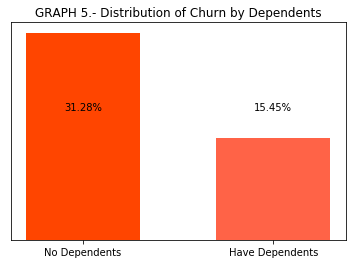

In [31]:
dx_no_dep = subset('Dependents', 0)
dx_dep = subset('Dependents', 1)

plott_bar(['No Dependents','Have Dependents'], [dx_no_dep.mean(), dx_dep.mean()], 2, 5,
         title='Churn by Dependents', save_name='Churn by Dependents',
         color1='orangered', color2='tomato')


__b) By Service__

+ *__Phone Service__*

In [32]:
dx_no_phone = subset('PhoneService', 0)
dx_phone = subset('PhoneService',1)

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    1
3    0
4    1
Name: PhoneServiceLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    1
3    0
4    1
Name: PhoneServiceLab, dtype: int32

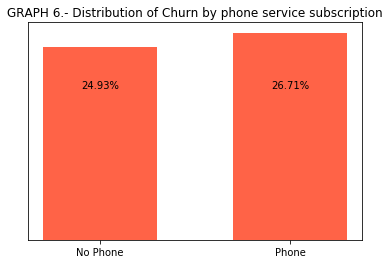

In [33]:
plott_bar(['No Phone','Phone'], [dx_no_phone.mean(), dx_phone.mean()], 2, 6,
         title='Churn by phone service subscription', save_name='Churn by phone service subscription',
         color1='tomato', color2='tomato')

In [34]:
sm.stats.ttest_ind(dx_no_phone, dx_phone)

(-1.0021309668860987, 0.3163147813431686, 7041.0)

No significant difference

+ *__Multiple Phone Lines Service__*

In [35]:
set(df.MultipleLines)

{'No', 'No phone service', 'Yes'}

In [36]:
dx_mult_oneline = subset('MultipleLines', 0)
dx_mult_noline = subset('MultipleLines', 1)
dx_mult_lines = subset('MultipleLines', 2)

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    0
3    1
4    0
Name: MultipleLinesLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    0
3    1
4    0
Name: MultipleLinesLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    0
3    1
4    0
Name: MultipleLinesLab, dtype: int32

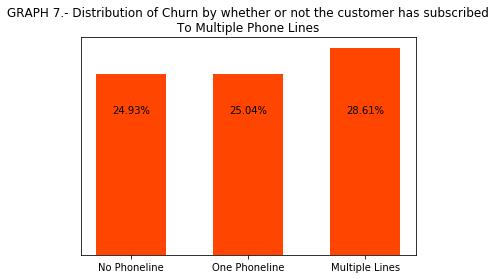

In [37]:
plott_bar(['No Phoneline','One Phoneline', 'Multiple Lines'], 
          [dx_mult_noline.mean(), dx_mult_oneline.mean(), dx_mult_lines.mean()], 3, 7,
          title='Churn by whether or not the customer has subscribed\nTo Multiple Phone Lines', 
          save_name='Churn by Multiple Phone Lines',
          color1='orangered', color2='orangered')

In [38]:
print('No -- One:',sm.stats.ttest_ind(dx_mult_noline, dx_mult_oneline))
print('One -- Mu:',sm.stats.ttest_ind(dx_mult_oneline, dx_mult_lines))
print('No --- Mu:',sm.stats.ttest_ind(dx_mult_noline, dx_mult_oneline))

No -- One: (-0.06465533249743748, 0.9484516031386366, 4070.0)
One -- Mu: (-3.208873143061571, 0.0013391771071854304, 6359.0)
No --- Mu: (-0.06465533249743748, 0.9484516031386366, 4070.0)


The customers with no phoneline at all churn about as much as the ones with just one phoneline (around 25% of both groups churn). The customers with multiple lines churn significantly higher, which is about 29% of the group being involved in churning.

+ *__Internet Service__*

In [39]:
set(df.InternetService)

{'DSL', 'Fiber optic', 'No'}

In [40]:
dx_Net_dsl = subset('InternetService', 0)
dx_Net_fiber = subset('InternetService', 1)
dx_Net_no = subset('InternetService', 2)

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    1
Name: InternetServiceLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    1
Name: InternetServiceLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    1
Name: InternetServiceLab, dtype: int32

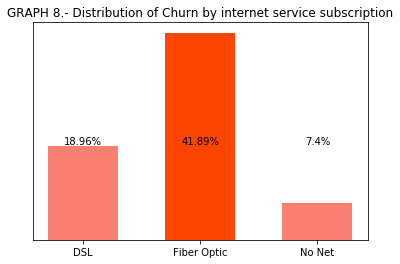

In [41]:
plott_bar(['DSL','Fiber Optic', 'No Net'], [dx_Net_dsl.mean(), dx_Net_fiber.mean(), dx_Net_no.mean()], 3, 8,
         title='Churn by internet service subscription', save_name='Churn by internet service subscription',
         color1='salmon', color2='orangered')

+ *__Online Security__*

In [42]:
set(df.OnlineSecurity)

{'No', 'No internet service', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    2
2    2
3    2
4    0
Name: OnlineSecurityLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    2
2    2
3    2
4    0
Name: OnlineSecurityLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    2
2    2
3    2
4    0
Name: OnlineSecurityLab, dtype: int32

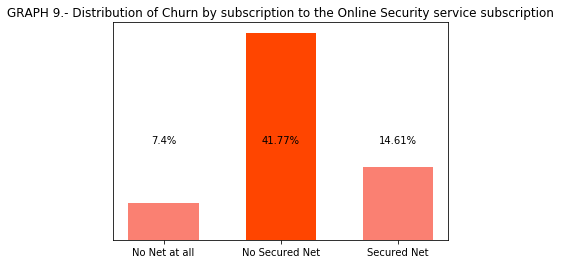

In [43]:
dx_no_sec = subset('OnlineSecurity', 0)
dx_no_net = subset('OnlineSecurity', 1)
dx_security = subset('OnlineSecurity', 2)

plott_bar(['No Net at all', 'No Secured Net', 'Secured Net'], [dx_no_net.mean(), dx_no_sec.mean(), dx_security.mean()], 
          3, 9, title='Churn by subscription to the Online Security service subscription', 
          save_name='Churn by Online Security', 
          color1='salmon', color2='orangered')

+ *__Online Backup__*

In [44]:
set(df.OnlineBackup)

{'No', 'No internet service', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    2
1    0
2    2
3    0
4    0
Name: OnlineBackupLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    2
1    0
2    2
3    0
4    0
Name: OnlineBackupLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    2
1    0
2    2
3    0
4    0
Name: OnlineBackupLab, dtype: int32

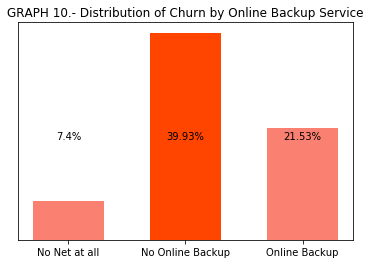

In [45]:
dx_no_backup = subset('OnlineBackup', 0)
dx_no_netserv = subset('OnlineBackup', 1)
dx_backup = subset('OnlineBackup', 2)

plott_bar(['No Net at all', 'No Online Backup', 'Online Backup'], 
          [dx_no_netserv.mean(), dx_no_backup.mean(), dx_backup.mean()], 
          3, 10, title='Churn by Online Backup Service', save_name='Churn by Online Backup Service', 
          color1='salmon', color2='orangered')

+ __*Device Protection*__

In [46]:
set(df.DeviceProtection)

{'No', 'No internet service', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    2
2    0
3    2
4    0
Name: DeviceProtectionLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    2
2    0
3    2
4    0
Name: DeviceProtectionLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    2
2    0
3    2
4    0
Name: DeviceProtectionLab, dtype: int32

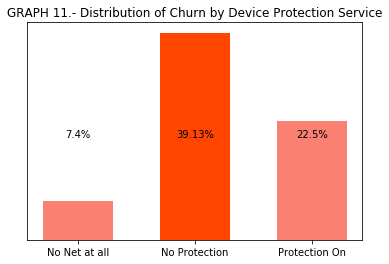

In [47]:
dx_no_protect = subset('DeviceProtection', 0)
dx_no_netp = subset('DeviceProtection', 1)
dx_protect = subset('DeviceProtection', 2)

plott_bar(['No Net at all', 'No Protection', 'Protection On'], 
          [dx_no_netp.mean(), dx_no_protect.mean(), dx_protect.mean()], 
          3, 11, title='Churn by Device Protection Service', save_name='Churn by Device Protection Service', 
          color1='salmon', color2='orangered')

+ __*Tech Support*__

In [48]:
set(df.TechSupport)

{'No', 'No internet service', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    2
4    0
Name: TechSupportLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    2
4    0
Name: TechSupportLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    2
4    0
Name: TechSupportLab, dtype: int32

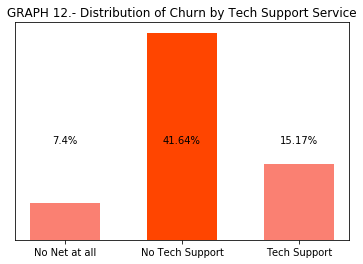

In [49]:
dx_no_support = subset('TechSupport', 0)
dx_no_nets = subset('TechSupport', 1)
dx_support = subset('TechSupport', 2)

plott_bar(['No Net at all', 'No Tech Support', 'Tech Support'], 
          [dx_no_nets.mean(), dx_no_support.mean(), dx_support.mean()], 
          3, 12, title='Churn by Tech Support Service', save_name='Churn by Tech Support Service', 
          color1='salmon', color2='orangered')

+ __*Streaming TV*__

In [50]:
set(df.StreamingTV)

{'No', 'No internet service', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: StreamingTVLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: StreamingTVLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: StreamingTVLab, dtype: int32

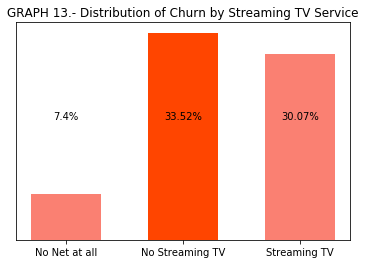

In [51]:
dx_no_tv = subset('StreamingTV', 0)
dx_no_nettv = subset('StreamingTV', 1)
dx_tv = subset('StreamingTV', 2)

plott_bar(['No Net at all', 'No Streaming TV', 'Streaming TV'], 
          [dx_no_nettv.mean(), dx_no_tv.mean(), dx_tv.mean()], 
          3, 13, title='Churn by Streaming TV Service', save_name='Churn by Streaming TV Service', 
          color1='salmon', color2='orangered')

In [52]:
sm.stats.ttest_ind(dx_no_tv, dx_tv)

(2.7538733725078326, 0.005908751743140201, 5515.0)

+ __*Streaming Movies*__

In [53]:
set(df.StreamingMovies)

{'No', 'No internet service', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: StreamingMoviesLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: StreamingMoviesLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    0
2    0
3    0
4    0
Name: StreamingMoviesLab, dtype: int32

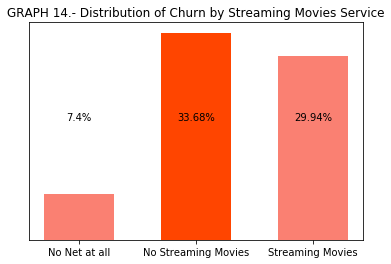

In [54]:
dx_no_movie = subset('StreamingMovies', 0)
dx_no_netm = subset('StreamingMovies', 1)
dx_movie = subset('StreamingMovies', 2)

plott_bar(['No Net at all', 'No Streaming Movies', 'Streaming Movies'], 
          [dx_no_netm.mean(), dx_no_movie.mean(), dx_movie.mean()], 
          3, 14, title='Churn by Streaming Movies Service', save_name='Churn by Streaming Movies Service', 
          color1='salmon', color2='orangered')

__c) By Billing Information__

Mean MONTHLY CHARGES paid by **CHURNERS who have internet (FIBER)** from us

In [55]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.InternetServiceLab==1)].mean()

MonthlyCharges    88.126484
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have internet (DSL)** from us

In [56]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.InternetServiceLab==0)].mean()

MonthlyCharges    49.083224
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have internet (DSL or FIBER)** from us

In [57]:
df[['MonthlyCharges']][(df.ChurnLab==1) & ((df.InternetServiceLab==0)|(df.InternetServiceLab==1))].mean()

MonthlyCharges    77.920985
dtype: float64

Mean MONTHLY CHARGES paid by **any customer who HAVE INTERNET** from us **and uses any of the ONLINE SERVICES** from us

In [58]:
df[['MonthlyCharges']][(df.InternetServiceLab==1) & ((df.OnlineSecurityLab==2) | (df.OnlineBackupLab==2)
                        | (df.DeviceProtectionLab==2) | (df.TechSupportLab==2) | (df.StreamingTVLab==2) 
                        | (df.StreamingMoviesLab==2))].mean()

MonthlyCharges    94.373545
dtype: float64

In [59]:
df[['MonthlyCharges', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies']].head()

,MonthlyCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,29.85,No,Yes,No,No,No,No
1,56.95,Yes,No,Yes,No,No,No
2,53.85,Yes,Yes,No,No,No,No
3,42.30,Yes,No,Yes,Yes,No,No
4,70.70,No,No,No,No,No,No


Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and ONLINE SECURITY** from us

In [60]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.OnlineSecurityLab==2)].mean()

MonthlyCharges    81.581356
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and ONLINE BACKUP** from us

In [61]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.OnlineBackupLab==2)].mean()

MonthlyCharges    85.956788
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and DEVICE PROTECTION** from us

In [62]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.DeviceProtectionLab==2)].mean()

MonthlyCharges    88.214679
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and TECH SUPPORT** from us

In [63]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.TechSupportLab==2)].mean()

MonthlyCharges    84.25629
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and STREAMING TV** from us

In [64]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.StreamingTVLab==2)].mean()

MonthlyCharges    90.497359
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and STREAMING MOVIES** from us

In [65]:
df[['MonthlyCharges']][(df.ChurnLab==1) & (df.StreamingMoviesLab==2)].mean()

MonthlyCharges    89.933619
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and ONLINE SECURITY** from us

In [66]:
df[['MonthlyCharges', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies']][((df.OnlineSecurityLab==2) | (df.OnlineBackupLab==2) | (df.DeviceProtectionLab==2)\
                        | (df.TechSupportLab==2) | (df.StreamingTVLab==2) | (df.StreamingMoviesLab==2)) \
                        & (df.ChurnLab==1)].mean()

MonthlyCharges    82.219512
dtype: float64

Mean MONTHLY CHARGES paid by **CHURNERS who have INTERNET** from us or not **and NONE of the online services** from us

In [67]:
df[['MonthlyCharges', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies']][((df.OnlineSecurityLab==0) & (df.OnlineBackupLab==0) & (df.DeviceProtectionLab==0)\
                        & (df.TechSupportLab==0) & (df.StreamingTVLab==0) & (df.StreamingMoviesLab==0)) & (df.ChurnLab!=1)].mean()

MonthlyCharges    55.544864
dtype: float64

Charges paid by **People with NO INTERNET and NONE of the online Services**

In [68]:
df[['MonthlyCharges', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies']][((df.OnlineSecurityLab==1) & (df.OnlineBackupLab==1) & (df.DeviceProtectionLab==1)\
                        & (df.TechSupportLab==1) & (df.StreamingTVLab==1) & (df.StreamingMoviesLab==1)) & (df.ChurnLab!=1)].mean()

MonthlyCharges    21.136058
dtype: float64

+ __*Frequency of Contract*__

In [69]:
set(df.Contract)

{'Month-to-month', 'One year', 'Two year'}

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    0
3    1
4    0
Name: ContractLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    0
3    1
4    0
Name: ContractLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    0
1    1
2    0
3    1
4    0
Name: ContractLab, dtype: int32

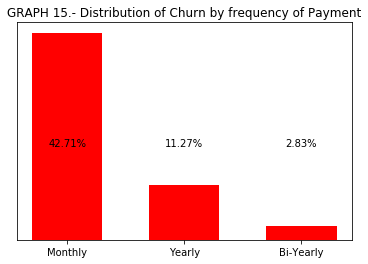

In [70]:
dx_mc = subset('Contract', 0)
dx_yc = subset('Contract', 1)
dx_twoyc = subset('Contract', 2)

plott_bar(['Monthly', 'Yearly', 'Bi-Yearly'], 
          [dx_mc.mean(), dx_yc.mean(), dx_twoyc.mean()], 
          3, 15, title='Churn by frequency of Payment', save_name='Churn by frequency of Payment', 
          color1='red', color2='red')

Text(0.5, 1.0, 'GRAPH 16.- Boxplot of tenure for the churners')

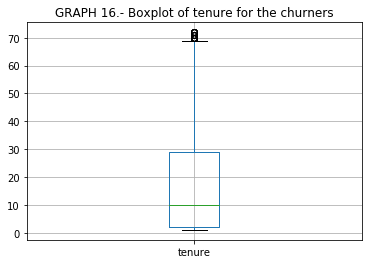

In [71]:
df[['tenure']][(df.ChurnLab==1)].boxplot()
plt.title('GRAPH 16.- Boxplot of tenure for the churners')

Text(0.5, 1.0, 'GRAPH 17.- Boxplot of tenure for the churners\nwith a monthly contract')

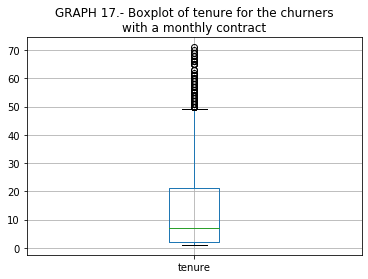

In [72]:
df[['tenure']][(df.ContractLab==0) & (df.ChurnLab==1)].boxplot()
plt.title('GRAPH 17.- Boxplot of tenure for the churners\nwith a monthly contract')

Text(0.5, 1.0, 'GRAPH 18.- Boxplot of tenure for the churners\nwith a yearly contract')

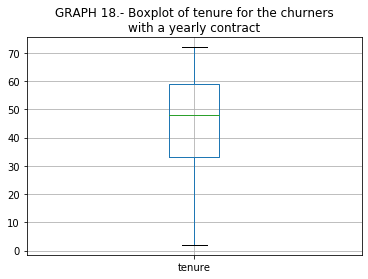

In [73]:
df[['tenure']][(df.ContractLab==1) & (df.ChurnLab==1)].boxplot()
plt.title('GRAPH 18.- Boxplot of tenure for the churners\nwith a yearly contract')

Text(0.5, 1.0, 'GRAPH 19.- Boxplot of tenure for the churners\nwith a bi-yearly contract')

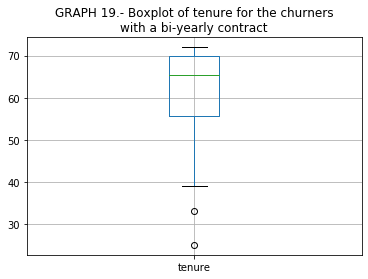

In [74]:
df[['tenure']][(df.ContractLab==2) & (df.ChurnLab==1)].boxplot()
plt.title('GRAPH 19.- Boxplot of tenure for the churners\nwith a bi-yearly contract')

+ __*Paperless Payment*__

In [75]:
set(df.PaperlessBilling)

{'No', 'Yes'}

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    1
3    0
4    1
Name: PaperlessBillingLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    1
1    0
2    1
3    0
4    1
Name: PaperlessBillingLab, dtype: int32

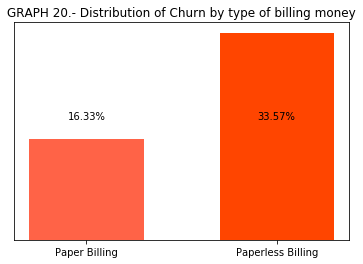

In [76]:
dx_no_paper = subset('PaperlessBilling', 0)
dx_paper = subset('PaperlessBilling', 1)

plott_bar(['Paper Billing','Paperless Billing'], [dx_no_paper.mean(), dx_paper.mean()], 2, 20,
         title='Churn by type of billing money', save_name='Churn by type of billing money',
         color1='tomato', color2='orangered')

+ __*Payment Method*__

In [77]:
set(df.PaymentMethod)

{'Bank transfer (automatic)',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check'}

Variable converted and added to the DataFrame successfully
int32


0    2
1    3
2    3
3    0
4    2
Name: PaymentMethodLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    2
1    3
2    3
3    0
4    2
Name: PaymentMethodLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    2
1    3
2    3
3    0
4    2
Name: PaymentMethodLab, dtype: int32

Variable converted and added to the DataFrame successfully
int32


0    2
1    3
2    3
3    0
4    2
Name: PaymentMethodLab, dtype: int32

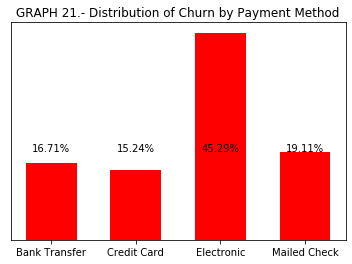

In [78]:
dx_bank = subset('PaymentMethod', 0)
dx_card = subset('PaymentMethod', 1)
dx_elec = subset('PaymentMethod', 2)
dx_mail = subset('PaymentMethod', 3)

plott_bar(['Bank Transfer','Credit Card', 'Electronic', 'Mailed Check'], 
          [dx_bank.mean(), dx_card.mean(), dx_elec.mean(), dx_mail.mean()], 4, 21,
         title='Churn by Payment Method', save_name='Churn by Payment Method',
         color1='red', color2='red')

+ __*Total Charges*__

In [79]:
df['TotalCharges']
df['TotalCharges'].replace(' ', 0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'][df['TotalCharges']!=0].mean()
df['TotalCharges'].replace(0, df['TotalCharges'][df['TotalCharges']!=0].mean(), inplace=True)

Text(0, 0.5, 'Total Charges')

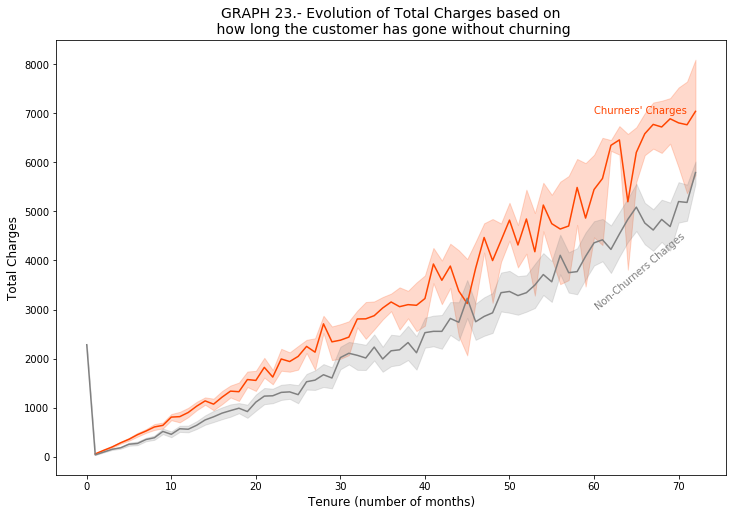

In [80]:
import seaborn as sns
ax = plt.figure(figsize=(12,8))
sns.lineplot(y=df.TotalCharges[df.ChurnLab==1], x=df.tenure[df.ChurnLab==1], data=df, color='orangered')
sns.lineplot(x=df.tenure[df.ChurnLab==0], y=df.TotalCharges[df.ChurnLab==0], data=df, color='grey')
plt.text(60, 7000, "Churners' Charges", color='orangered')
plt.text(60, 3000, "Non-Churners Charges", rotation = 40, color='grey')
plt.title('GRAPH 23.- Evolution of Total Charges based on\n how long the customer has gone without churning', size=14)
plt.xlabel('Tenure (number of months)', size=12)
plt.ylabel('Total Charges', size=12)

In [81]:
charge_tenure = df[['MonthlyCharges', 'TotalCharges', 'tenure', 'ChurnLab']].groupby(['tenure', 'ChurnLab']).mean()

In [82]:
charge_tenure.unstack()

MonthlyCharges            TotalCharges             
ChurnLab              0          1            0            1
tenure                                                      
0             41.418182        NaN  2283.300441          NaN
1             37.909013  58.197368    37.909013    58.197368
2             47.881739  65.924390    95.997391   131.474797
3             50.924528  66.010638   152.135849   200.123404
4             45.649462  70.635542   182.525806   284.319277
...                 ...        ...          ...          ...
68            70.879670  98.005556  4836.758791  6720.550000
69            68.190805  99.450000  4691.040230  6887.931250
70            74.212963  97.645455  5200.868981  6803.995455
71            72.952744  95.133333  5182.708537  6765.908333
72            80.423174  96.875000  5791.770225  7039.150000

[73 rows x 4 columns]

In [83]:
charge_tenure.reset_index(inplace=True)

In [84]:
charge_tenure

,tenure,ChurnLab,MonthlyCharges,TotalCharges
0,0,0,41.418182,2283.300441
1,1,0,37.909013,37.909013
2,1,1,58.197368,58.197368
3,2,0,47.881739,95.997391
4,2,1,65.924390,131.474797
...,...,...,...,...
140,70,1,97.645455,6803.995455
141,71,0,72.952744,5182.708537
142,71,1,95.133333,6765.908333
143,72,0,80.423174,5791.770225


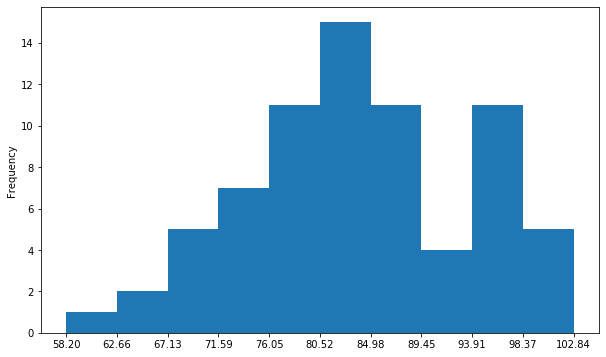

In [85]:
count, bin_edges = np.histogram(charge_tenure['MonthlyCharges'][charge_tenure['ChurnLab']==1])
plt.figure(figsize=(10,6))
charge_tenure['MonthlyCharges'][charge_tenure['ChurnLab']==1].plot(kind='hist', xticks=bin_edges)


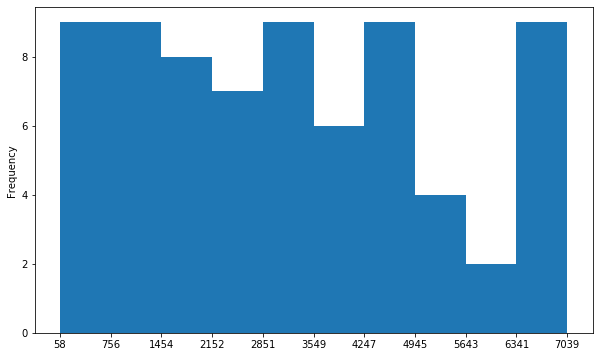

In [86]:
count2, bin_edges2 = np.histogram(charge_tenure['TotalCharges'][charge_tenure['ChurnLab']==1])
plt.figure(figsize=(10,6))
charge_tenure['TotalCharges'][charge_tenure['ChurnLab']==1].plot(kind='hist', xticks=bin_edges2)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
customerID             7043 non-null object
gender                 7043 non-null object
SeniorCitizen          7043 non-null int64
Partner                7043 non-null object
Dependents             7043 non-null object
tenure                 7043 non-null int64
PhoneService           7043 non-null object
MultipleLines          7043 non-null object
InternetService        7043 non-null object
OnlineSecurity         7043 non-null object
OnlineBackup           7043 non-null object
DeviceProtection       7043 non-null object
TechSupport            7043 non-null object
StreamingTV            7043 non-null object
StreamingMovies        7043 non-null object
Contract               7043 non-null object
PaperlessBilling       7043 non-null object
PaymentMethod          7043 non-null object
MonthlyCharges         7043 non-null float64
TotalCharges           7043 non-null float64
Churn        

### BONUS : How long will it take for the company to lose all its customers?

Let $n$ be the number of months it will take for the company to lose all its customers. Let $N$ be the size of the dataset and $p$ the proportion of Total Churn observed for the month. To answer this question, we have to assume that $p$ and $N$ remain fixed during all future periods. Then, we can determine a function of $n$ given $N$ and $p$, say $P(n)$, such that $P(n)=0$. Said function is the population of customers at any time $n$ following the current month. For the current month, $n=0$.

Let's start empirically. We have $N=$`len(df)`$=7043$ and $p=26.54$%=0.2654.

+ At month $k=0 : P(0) = 7043-7043*0.2654 = 5173.7878 = 7043*[(1-0.2654)] = 7043*[(1-0.2654)]^1$
+ At month $k=1$ : $P(1) = 5173.7878-5173.7878*0.2654 = 5173.7878*(1-0.25) = 3800.66451788 = P(0)*[(1-0.2654)] = 7043*[(1-0.2654)]*(1-0.2654) = 7043*(1-0.2654)^2$ 
+ At month $k=2$ : $P(2) = 3800.66451788-3800.66451788*0.2654 = 3800.66451788*(1-0.2654) = 2791.968154834648‬ = P(1)*[(1-0.2654)] = 7043*(1-0.2654)^2 * (1-0.2654) = 7043*(1-0.2654)^3$ 
+ ...
+ At month $k=n$ : $P(n) = N*(1-p)$^$[n+1]$

Now we just have to solve the equation $P(n)=0$ in order to find $n$. But since we are facing an exponential function, we can never reach zero unless we approach +infinity. 

In reality, having a null population of customers is possible but having the expression of this population $P(n)=0$ is impossible, because the company won't last an infinity of months. So, conceptually, we only need to be as near zero as possible. And this is realized as soon as $P(n)<1$. Which makes sense, because we can't have any number of customers lesser than 1!

$P(n) < 1 <=> ln(N*(1-p)$^$[n+1]) < 0 <=> ln(N) + n*ln(1-p) + ln(1-p) < 0 <=> n*ln(1-p) < -[ln(N) + ln(1-p)]$ (*)

We now need to divide both sides by $ln(1-p)$, which is negative because $0 < (1-p) < 1$, so we change the inequality's direction so that (*) become:

$n > -[1+ (ln(N)/ln(1-p))]$

So, we just need to take the value noted above after said value has been rounded to its nearest integer, to which we add $1$, and here we have the corresponding value of $n$: $n = $`round(-[1+(np.log(N)/np.log(1-p))], 0) + 1`

In [88]:
n=round(-(1+(np.log(len(df))/np.log(1-0.2654))), 0) + 1
print('The company will lose all its customers after {} years and {} months'\
      .format(round(n/12), round(12*np.modf(n/12)[0])))

The company will lose all its customers after 2.0 years and 5.0 months


Let's check to see if we are right, with $n0 = 28$ months, $n= 29$ months and $n1 = 30$ months:

In [89]:
P_n0 = 7043*(1-.2654)**28
P_n = 7043*(1-.2654)**29
P_n1 = 7043*(1-.2654)**30
P_n0, P_n, P_n1

(1.2507875814186697, 0.9188285573101548, 0.6749714582000397)

Notice for $n0$, we still have one customer. From $n=29$, our number of customers is lesser than 1, we have no more customers. The rest is mathematical and makes sense with the reality: the number of customers is going closer and closer to zero (already zero in the reality) because we will still have no customers for any greater number of months given we still have the same monthly $p$-decrease and still haven't done anything to increase our $N$.

If we account for the confidence interval: (0.2551, 0.2757), we'll have:

In [90]:
b2 = round(-(1+(np.log(len(df))/np.log(1-0.2551))), 0) + 1
b1 = round(-(1+(np.log(len(df))/np.log(1-0.2757))), 0) + 1
b1, b2

(27.0, 30.0)

In [91]:
print('The company will lose all its customers between {} years and {} months, and {} years and {} months later'\
      .format(round(b1/12), round(12*np.modf(b1/12)[0]), round(b2/12), round(12*np.modf(b2/12)[0])))

The company will lose all its customers between 2.0 years and 3.0 months, and 2.0 years and 6.0 months later


The first demographics they'll lose are the ones where $(1-p)$ is the lowest (or equivalently where p is the highest), because the closer $(1-p)$ is to 0, the faster $P(n)$ will converge to 0. 

Thus, the company will lose first the Seniors, and then the customers with no dependants or with no partners. They will lose either males or females at about the same rhythm.

In [92]:
df['tenure'][df['ChurnLab']==1].mean(), df['tenure'][df['ChurnLab']==0].mean()

(17.979133226324237, 37.56996521066873)

So people churn in average after 17 months

In [93]:
sm.stats.DescrStatsW(df['tenure'][df['ChurnLab']==1]).zconfint_mean()

(17.093669740777816, 18.864596711870657)

In [94]:
df['MonthlyCharges'][df['ChurnLab']==1].mean(), df['MonthlyCharges'][df['ChurnLab']==0].mean()

(74.4413322632423, 61.2651236953999)

In [95]:
sm.stats.DescrStatsW(df['MonthlyCharges'][df['ChurnLab']==1]).zconfint_mean()

(73.32307145290532, 75.55959307357942)

So people churn in average when their monthly charges are around 74.44 $$

In [96]:
df['TotalCharges'][df['ChurnLab']==1].mean(), df['TotalCharges'][df['ChurnLab']==0].mean()

(1531.7960941680035, 2554.765772100754)

Male, SeniorCitizen No, No partner, No Dependents, Have been customer for about 2 years now, Have MultipleLine as Phone Service, Have FiberOptic as Internet Service, Have No online services such as Security/BackUp/DeviceProtection/TechSupport/Streaming, Have monthly contract and pay by Electronic check, MonthlyCharges of about 79$ (make confidence interval).

### Study of Customer Profiles

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnLab,genderLab,PartnerLab,DependentsLab,PhoneServiceLab,MultipleLinesLab,InternetServiceLab,OnlineSecurityLab,OnlineBackupLab,DeviceProtectionLab,TechSupportLab,StreamingTVLab,StreamingMoviesLab,ContractLab,PaperlessBillingLab,PaymentMethodLab
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [98]:
slice=['genderLab','SeniorCitizen', 'PartnerLab', 'DependentsLab', 'tenure', 'PhoneServiceLab', 'MultipleLinesLab', 
      'InternetServiceLab', 'OnlineSecurityLab', 'OnlineBackupLab', 'DeviceProtectionLab', 
      'StreamingTVLab', 'StreamingMoviesLab', 'ContractLab', 'PaperlessBillingLab', 'MonthlyCharges', 'TotalCharges']

In [99]:
dz = df.iloc[:,1:21]
dz.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
dz_dum = pd.get_dummies(dz)
dz_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [101]:
dz_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dz_stand = scaler.fit_transform(dz_dum)
dz_stand[:5]

array([[-0.43991649, -1.27744458, -1.16032292, -0.99497138,  1.00955867,
        -1.00955867, -1.03453023,  1.03453023,  0.65401193, -0.65401193,
         3.05401039, -3.05401039, -0.96332984,  3.05401039, -0.85417615,
         1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
        -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
        -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
         1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
        -0.79607014,  0.90418382, -0.51424938, -0.56297505, -0.8297975 ,
         0.8297975 , -0.5298852 , -0.52504733,  1.40641839, -0.54480692,
         0.60102348, -0.60102348],
       [-0.43991649,  0.06632742, -0.25962894, -0.17387565, -0.99053183,
         0.99053183,  0.96662231, -0.96662231,  0.65401193, -0.65401193,
        -0.32743831,  0.32743831,  1.03806605, -0.32743831, -0.85417615,
         1.38171215, -0.88565976, -0.52592737, -0.99334883, -0.52592737,
         1.57745

In [103]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=15)
k_means.fit(dz_stand)
labels = k_means.labels_
print(labels)

[2 2 2 ... 2 2 0]


In [104]:
dz_dum['clus_km_Lab'] = labels
dz_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,clus_km_Lab
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,2
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,2
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,2
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,2


In [105]:
dz_dum.groupby(['clus_km_Lab']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
clus_km_Lab,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.162658,53.541378,85.682083,4665.539198,0.499796,0.500204,0.295149,0.704851,0.599674,0.400326,0.117407,0.882593,0.267020,0.117407,0.615573,0.478190,0.521810,0.0,0.409295,0.0,0.590705,0.323685,0.0,0.676315,0.292295,0.0,0.707705,0.377497,0.0,0.622503,0.304117,0.0,0.695883,0.300448,0.0,0.699552,0.196086,0.382389,0.421525,0.356298,0.643702,0.325724,0.322055,0.244191,0.108031,0.900530,0.099470
1,0.034076,30.547182,21.079194,671.582374,0.489515,0.510485,0.516383,0.483617,0.578637,0.421363,0.000000,1.000000,0.775885,0.000000,0.224115,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.343381,0.238532,0.418087,0.707733,0.292267,0.217562,0.216907,0.079948,0.485583,0.925950,0.074050
2,0.225522,16.330940,69.768799,1178.812875,0.494452,0.505548,0.694843,0.305157,0.841710,0.158290,0.128590,0.871410,0.506201,0.128590,0.365209,0.407311,0.592689,0.0,0.813969,0.0,0.186031,0.748695,0.0,0.251305,0.776110,0.0,0.223890,0.831266,0.0,0.168734,0.673629,0.0,0.326371,0.668407,0.0,0.331593,0.936684,0.055809,0.007507,0.299608,0.700392,0.134791,0.130875,0.536554,0.197781,0.506527,0.493473


In [106]:
dz_dum.groupby(['clus_km_Lab']).count()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
clus_km_Lab,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453
1,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
2,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064


In [107]:
dz_dum[dz_dum.Churn_Yes==0].groupby(['clus_km_Lab']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
clus_km_Lab,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.156179,53.786329,84.378022,4625.386828,0.502037,0.497963,0.296062,0.703938,0.592123,0.407877,0.124943,0.875057,0.276143,0.124943,0.598914,0.509733,0.490267,0.0,0.390222,0.0,0.609778,0.325487,0.0,0.674513,0.297420,0.0,0.702580,0.363966,0.0,0.636034,0.326392,0.0,0.673608,0.319602,0.0,0.680398,0.180172,0.369851,0.449977,0.371209,0.628791,0.328656,0.329561,0.226799,0.114984,1.0,0.0
1,0.033263,32.331210,21.136058,711.381283,0.489030,0.510970,0.498231,0.501769,0.564756,0.435244,0.000000,1.000000,0.765039,0.000000,0.234961,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.300778,0.251238,0.447983,0.714084,0.285916,0.222222,0.227884,0.075725,0.474168,1.0,0.0
2,0.176546,19.258376,64.902996,1285.887146,0.482603,0.517397,0.697809,0.302191,0.827320,0.172680,0.152062,0.847938,0.547680,0.152062,0.300258,0.538660,0.461340,0.0,0.757088,0.0,0.242912,0.731959,0.0,0.268041,0.790593,0.0,0.209407,0.788015,0.0,0.211985,0.739046,0.0,0.260954,0.735180,0.0,0.264820,0.900129,0.086985,0.012887,0.369845,0.630155,0.158505,0.154639,0.442010,0.244845,1.0,0.0


In [108]:
dz_dum[dz_dum.Churn_Yes==0].groupby(['clus_km_Lab']).count()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
clus_km_Lab,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209
1,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413,1413
2,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552


### Customer Profiles

We now have 2203 customers who haven't churn so far in the group where customers are:
+ Juniors;
+ Pay 84.52 dollars monthly charges in average;
+ Have partner, but no dependents;
+ Have phone service and multiple lines of it;
+ Have any internet service between DSL and Fiber-optic;
+ Have online security, online backup, device protection, TechSupport, Streaming TV and Movies
+ Contract over one or two years
+ Have paperlessbilling and automatic payment method (Bank account or credit card debiting)

We've lost about 10% of our previous number in this group by churn. If we augment the current number by 10%, which means up to 222 customers, we will have raised our monthly revenue up to:

In [109]:
revenue_plus = 221*84.52
revenue_plus

18678.92

In [110]:
total_revenue = dz_dum[['MonthlyCharges']][dz_dum.Churn_Yes==0].sum()
total_revenue

MonthlyCharges    316985.75
dtype: float64

In [111]:
revenue_0 = dz_dum[['MonthlyCharges']][(dz_dum.clus_km_Lab==1) & (dz_dum.Churn_Yes==0)].sum()
revenue_0

MonthlyCharges    29865.25
dtype: float64

In [112]:
percent_0 = revenue_plus/revenue_0
percent_total = revenue_plus/total_revenue
print('It will increase the revenue of the group by {} and the total revenue by {}'.
      format(str(round(percent_0[0], 2)*100)+'%', str(round(percent_total[0], 2)*100)+'%'))

It will increase the revenue of the group by 63.0% and the total revenue by 6.0%


### Logistic Regression to estimate the churn

In [113]:
dz_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,clus_km_Lab
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,2
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,2
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,2
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,2


We will drop the variables:
+ `TotalCharges` because it has no logical link with the Churn and may only serve for the company's accounting, and because it must be strongly correlated with `MonthlyCharges` that we are keeping;
+ `clus_km_Lab`
+ `Churn_No`

In [114]:
dz_dum.drop(columns=["TotalCharges", "Churn_No"], inplace=True)

In [115]:
dz_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,clus_km_Lab
0,0,1,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,2
1,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,2
2,0,2,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,2
3,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,2


In [116]:
X = dz_dum.iloc[:,:-2]
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [117]:
len(X)

7043

In [118]:
y=dz_dum['Churn_Yes']
print(y[:5])
len(y)

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: uint8


7043

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4930, 44) (2113, 44) (4930,) (2113,)


In [120]:
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.fit_transform(X_test)
y_train_ = np.asarray(y_train).astype('int')
y_test_ = np.asarray(y_test).astype('int')

y_train_.shape, y_test_.shape

((4930,), (2113,))

In [121]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_trains, y_train_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
model.intercept_, model.coef_

(array([-1.59128827]),
 array([[ 0.0762506 , -0.81971881, -0.37008503,  0.01354708, -0.01354708,
         -0.0109309 ,  0.0109309 ,  0.04379189, -0.04379189,  0.00796143,
         -0.00796143, -0.08654032,  0.00796143,  0.08264408, -0.25854138,
          0.31558974, -0.08240796,  0.10711943, -0.08240796, -0.04365271,
          0.05215218, -0.08240796,  0.01669169,  0.00822117, -0.08240796,
          0.06251809,  0.10978335, -0.08240796, -0.04616576, -0.06301414,
         -0.08240796,  0.13279826, -0.08052639, -0.08240796,  0.15046953,
          0.3156437 , -0.01030231, -0.35867783, -0.07439109,  0.07439109,
         -0.00887153, -0.04165752,  0.09598292, -0.0585482 ]]))

In [123]:
yhat = model.predict(X_tests)
yhat[:5]

array([0, 0, 0, 0, 1])

In [124]:
yhat_prob = model.predict_proba(X_tests)
yhat_prob[:5]

array([[0.94953703, 0.05046297],
       [0.96737195, 0.03262805],
       [0.62257729, 0.37742271],
       [0.98498844, 0.01501156],
       [0.45882005, 0.54117995]])

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, jaccard_similarity_score
print(jaccard_similarity_score(y_test_, yhat))
print(confusion_matrix(y_test_, yhat, labels=[0,1]))
print(classification_report(y_test_, yhat))
print(log_loss(y_test_, yhat_prob))

0.8135352579271179
[[1401  179]
 [ 215  318]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1580
           1       0.64      0.60      0.62       533

    accuracy                           0.81      2113
   macro avg       0.75      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

0.4030551394338205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [126]:
results = model.coef_

In [127]:
results.shape, dz_dum.shape

((1, 44), (7043, 46))

In [128]:
dz_dum.iloc[0:0,:-2].shape

(0, 44)

In [129]:
dz_results = dz_dum.iloc[0:0,:-2]
dz_results

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


In [130]:
dz_results.loc[0] = np.array(0)
dz_results

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
dz_results.loc[0] = results[0]
dz_res_final = dz_results.T

In [139]:
dz_res_final.rename(columns={0:'Coefficients'}, inplace=True)
dz_res_final

,Coefficients
SeniorCitizen,0.076251
tenure,-0.819719
MonthlyCharges,-0.370085
gender_Female,0.013547
gender_Male,-0.013547
Partner_No,-0.010931
Partner_Yes,0.010931
Dependents_No,0.043792
Dependents_Yes,-0.043792
PhoneService_No,0.007961


_For consultations, reach out to Data Scientist __© Grégory PINCHINAT__, by writing an email to: gregpinchy@gmail.com._